Index(['Race', 'Year', 'Name', 'Gender', 'Age', 'Country', 'Overall',
       'Finish Time', 'Finish'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886546 entries, 0 to 886545
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Race         886546 non-null  object
 1   Year         886546 non-null  int64 
 2   Name         886546 non-null  object
 3   Gender       886546 non-null  object
 4   Age          886546 non-null  int64 
 5   Country      886546 non-null  object
 6   Overall      886546 non-null  int64 
 7   Finish Time  886546 non-null  object
 8   Finish       886546 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 60.9+ MB
Race           0
Year           0
Name           0
Gender         0
Age            0
Country        0
Overall        0
Finish Time    0
Finish         0
dtype: int64


<Figure size 1400x900 with 0 Axes>

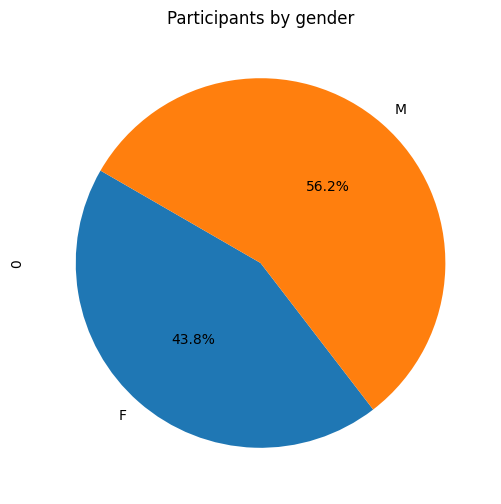

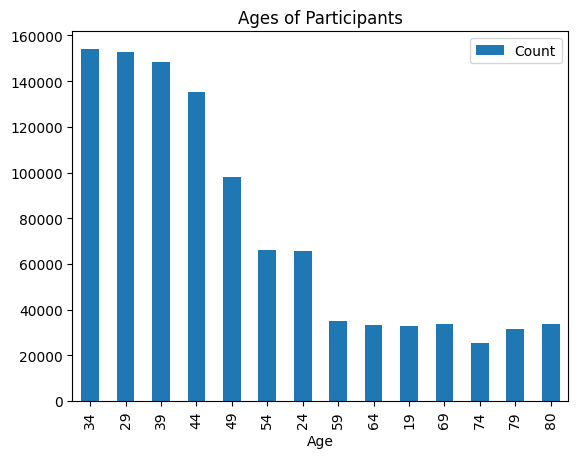

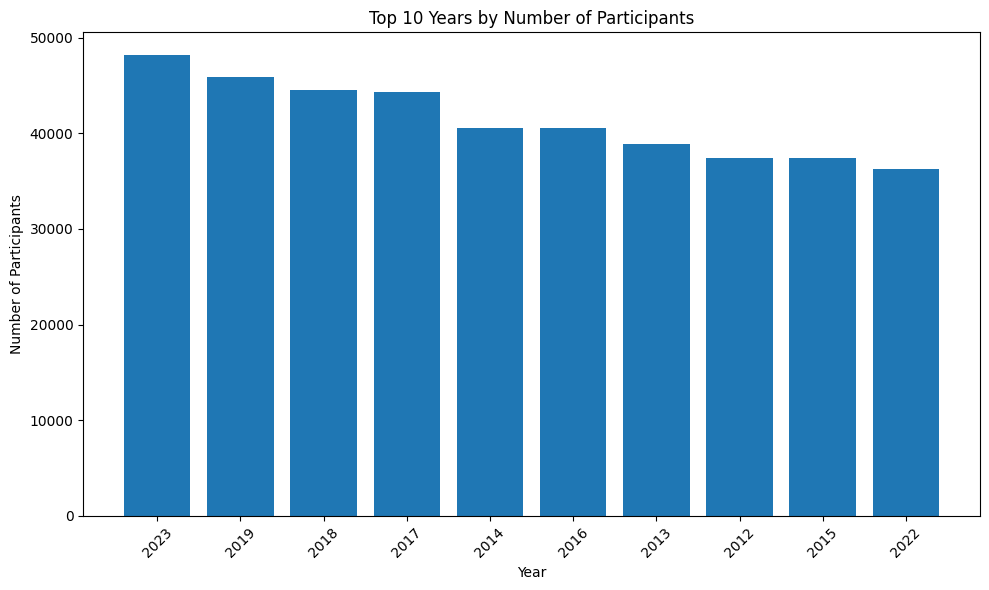

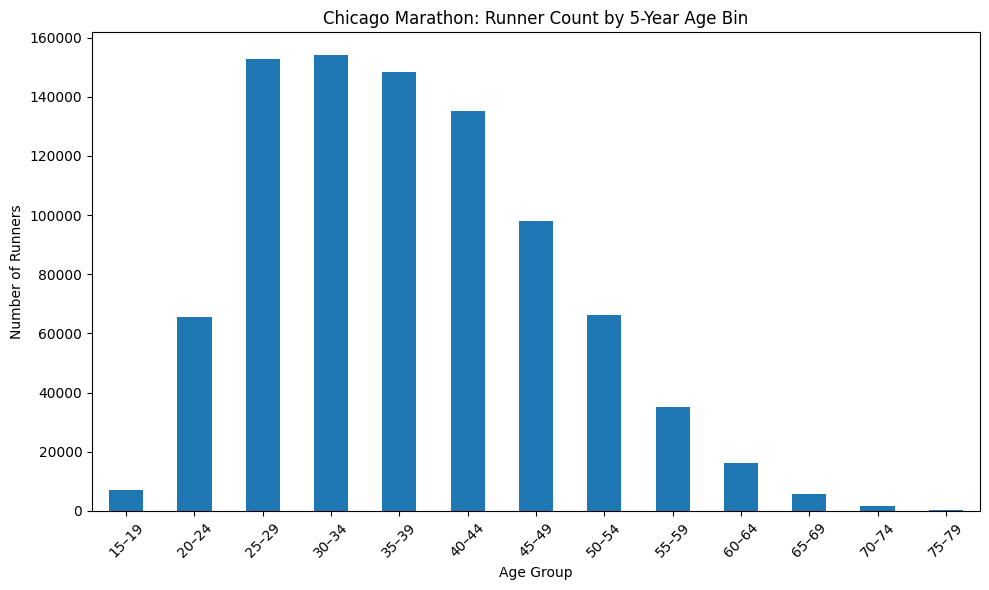

/var/folders/nz/mm1_d02n3xl6v8l03ymp94640000gn/T/ipykernel_67069/448359982.py:81: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = res.groupby('age_bin')['Finish'].mean() / 60  # to minutes


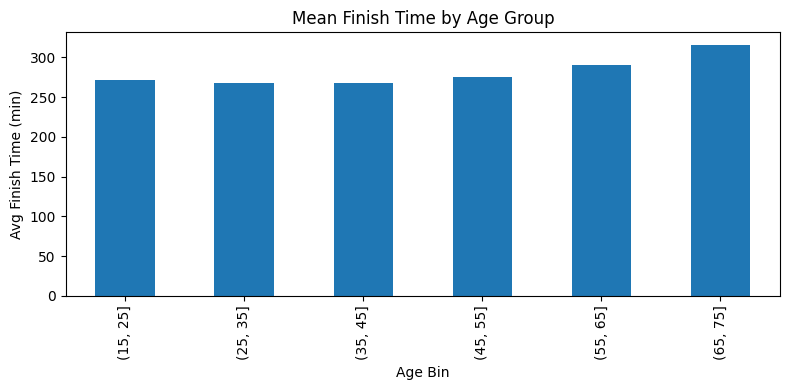

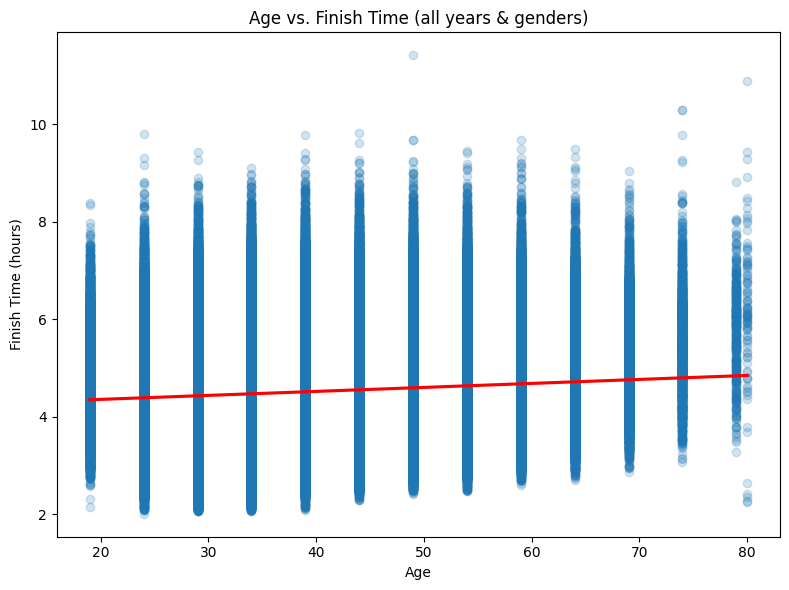

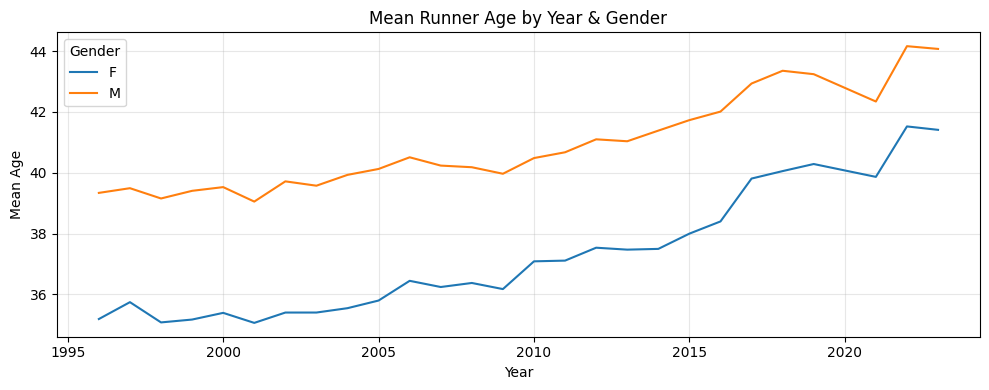

In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load and clean data
res = pd.read_csv('/Users/megantrapanese/Dropbox/MARATHON_DATA/data/Chicago/chic_res.csv')
weather = pd.read_csv('/Users/megantrapanese/Dropbox/MARATHON_DATA/data/Chicago/chic_weather.csv')

print(res.columns)
res['Name'] = res['Name'].fillna('Unknown')
res.info()
print(res.isna().sum())

#Explore the data
plt.figure(figsize=(14,9))
df2=res.groupby(['Gender']).agg({'Gender': ['count']})
df2.plot(kind='pie',
         figsize = (15,6),
         autopct= '%1.1f%%',
         startangle = 150,
         label = True,
         pctdistance = 0.55,
         legend=0, subplots=True, xlabel=0, ylabel=0)
plt.title('Participants by gender')

# Data percentage year wise
year_count= res.Year.value_counts()
year_count = year_count.reset_index()
year_count.columns=['Year', 'Count']
year_count = year_count.sort_values(by='Year')
year_count.plot.bar(x='Year')
plt.title('Year-wise Frequency of Participants')
#plt.show()
age_categories= res[res.Age>0]
age_categories['Age'].value_counts().plot.bar()
plt.title('Ages of Participants')
plt.show()

# Compute the number of participants per Year
counts = res.groupby('Year').size().sort_values(ascending=False).head(10)

# Plot the top 10 years by number of participants
plt.figure(figsize=(10, 6))
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.title('Top 10 Years by Number of Participants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 1. Define 5-year bins from, say, age 15 up to 84
bins   = list(range(15, 85, 5))  # [15,20,25,…,80]
labels = [f"{b}–{b+4}" for b in bins[:-1]]

# 2. Cut into bins and count
res['age_bin'] = pd.cut(res['Age'], bins=bins, labels=labels, right=False, include_lowest=True)
age_counts = res['age_bin'].value_counts().sort_index()

# 3. Plot the distribution
plt.figure(figsize=(10,6))
age_counts.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Number of Runners')
plt.title('Chicago Marathon: Runner Count by 5-Year Age Bin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create 10-year age bins
res['age_bin'] = pd.cut(res['Age'], bins=range(15, 80, 10))
grp = res.groupby('age_bin')['Finish'].mean() / 60  # to minutes

plt.figure(figsize=(8,4))
grp.plot(kind='bar')
plt.xlabel('Age Bin')
plt.ylabel('Avg Finish Time (min)')
plt.title('Mean Finish Time by Age Group')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.regplot(
    x='Age',
    y=res['Finish']/3600,
    data=res,
    scatter_kws={'alpha':0.2},
    line_kws={'color':'red'}
)
plt.xlabel('Age')
plt.ylabel('Finish Time (hours)')
plt.title('Age vs. Finish Time (all years & genders)')
plt.tight_layout()
plt.show()

mean_age = res.groupby(['Year','Gender'])['Age'].mean().unstack()
mean_age.plot(figsize=(10,4))
plt.xlabel('Year')
plt.ylabel('Mean Age')
plt.title('Mean Runner Age by Year & Gender')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Shape of full feature matrix X: (54, 6)

5-fold CV RMSE (OLS): 700.0 sec ± 216.3 sec

Forecasted average finish times (with covariate forecasts):

  Female:
    2024: 17867 sec → 04:57:46
    2025: 17914 sec → 04:58:33
    2026: 17961 sec → 04:59:21
    2027: 18008 sec → 05:00:08
    2028: 18055 sec → 05:00:55
    2029: 18102 sec → 05:01:42
    2030: 18150 sec → 05:02:29
    2031: 18197 sec → 05:03:16
    2032: 18244 sec → 05:04:03
    2033: 18291 sec → 05:04:50

  Male:
    2024: 15959 sec → 04:25:59
    2025: 15989 sec → 04:26:29
    2026: 16019 sec → 04:26:59
    2027: 16049 sec → 04:27:29
    2028: 16079 sec → 04:27:59
    2029: 16109 sec → 04:28:29
    2030: 16139 sec → 04:28:59
    2031: 16169 sec → 04:29:29
    2032: 16199 sec → 04:29:59
    2033: 16229 sec → 04:30:29


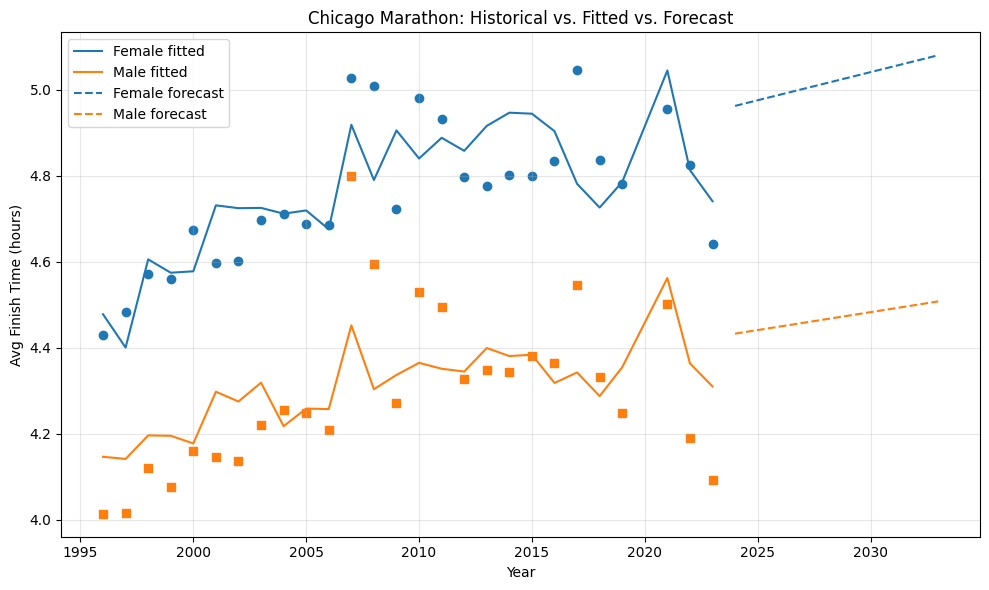

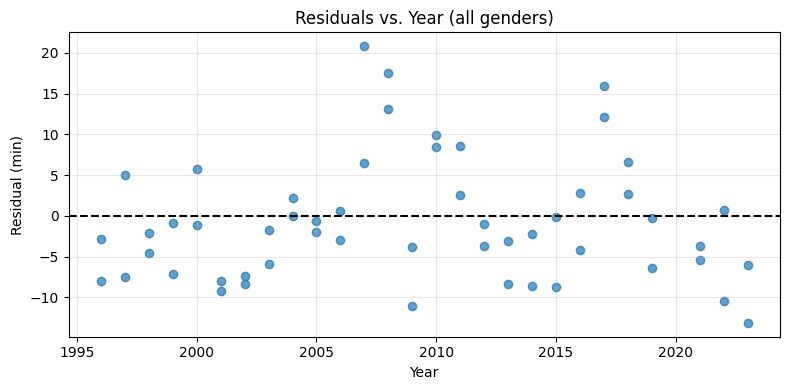


LIME explanation (feature contributions in seconds):
0.00 < male <= 1.00: +136091.874
0.00 < Year_x_male <= 2010.50: -88594.040
9.86 < sd_age <= 10.59: -1815.349
2003.00 < Year <= 2009.00: -830.266
17304.00 < n_finishers <= 20234.50: -720.693
39.41 < avg_age <= 40.86: -714.047


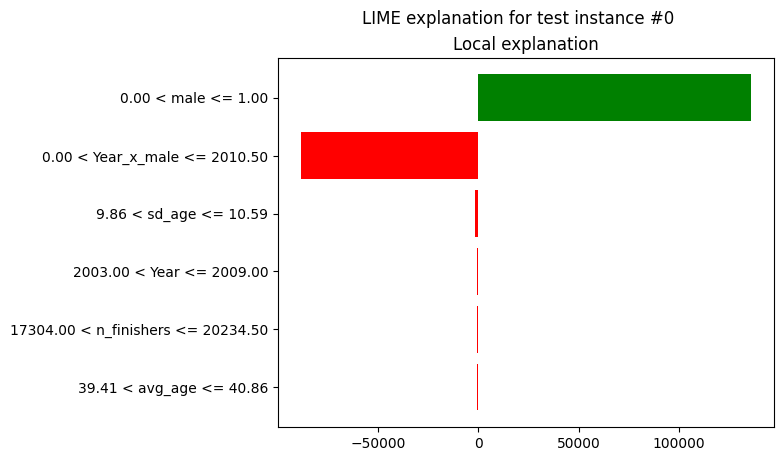

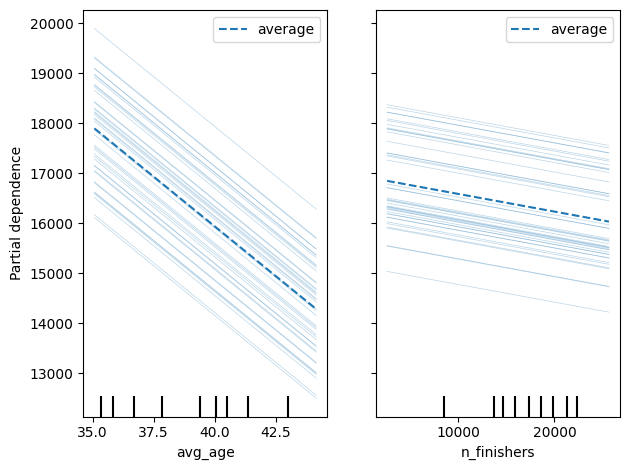


                   Comprehensive Model Performance Evaluation                   

Model    Train R²     Test R²      Train MAE    Test MAE     Train RMSE   Test RMSE   
-------------------------------------------------------------------------------------
OLS      0.780        0.910        371.2        305.3        476.6        334.8       

Practical Interpretation (in minutes):
Model    Train MAE       Test MAE        Train RMSE      Test RMSE      
-----------------------------------------------------------------
OLS      6.2             5.1             7.9             5.6            

Overfitting Analysis:
OLS generalizes well with consistent train/test performance

Model Coefficients (Slopes):
           Year: 247.6795
           male: 135478.5615
    Year_x_male: -66.9551
    n_finishers: -0.0352
        avg_age: -396.9282
         sd_age: -1129.5717

Slope Interpretation:
- A 1-unit increase in [feature] changes finish time by [coefficient] seconds

Forecast Trend Slopes:
Female

In [79]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import PartialDependenceDisplay

from lime.lime_tabular import LimeTabularExplainer
from sklearn.model_selection import GridSearchCV

# --- 1. Load and preprocess ---
res = pd.read_csv('/Users/megantrapanese/Dropbox/MARATHON_DATA/data/Chicago/chic_res.csv')

def time_to_sec(t):
    h, m, s = map(int, t.split(':'))
    return h*3600 + m*60 + s

res['finish_sec'] = res['Finish Time'].apply(time_to_sec)
res = res[res['Gender'].isin(['M','F'])]

# --- 2. Compute aggregated features per (Year, Gender) ---
grp = res.groupby(['Year','Gender'])
df = grp['finish_sec'].mean().rename('avg_finish_sec').to_frame()
df['n_finishers'] = grp.size()
df['avg_age']     = grp['Age'].mean()
df['sd_age']      = grp['Age'].std()

year_gender = df.reset_index()

# --- 3. Encode & assemble feature matrix ---
year_gender['male'] = (year_gender['Gender']=='M').astype(int)
year_gender['Year_x_male'] = year_gender['Year'] * year_gender['male']

features = [
    'Year','male','Year_x_male',
    'n_finishers','avg_age','sd_age'
]
X = year_gender[features].values
y = year_gender['avg_finish_sec'].values

# --- 4. Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Shape of full feature matrix X:", X.shape)
# --- 5. Compare multiple regressors ---
models = {
    'OLS'  : LinearRegression(),
}

results = {}
for name, mdl in models.items():
    mdl.fit(X_train, y_train)
    y_pred_i = mdl.predict(X_test)
    mae_i  = mean_absolute_error(y_test, y_pred_i)
    rmse_i = np.sqrt(mean_squared_error(y_test, y_pred_i))
    r2_i   = r2_score(y_test, y_pred_i)
    results[name] = (mae_i, rmse_i, r2_i)
    if name == 'OLS':
        # store in-sample OLS fits for later plotting
        year_gender['pred_sec'] = mdl.predict(year_gender[features].values)


# use OLS for forecasting & interpretation
model = models['OLS']

# --- 6. 5-fold CV on chosen model (optional) ---
neg_mse = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
cv_rmse = np.sqrt(-neg_mse)
print(f"\n5-fold CV RMSE (OLS): {cv_rmse.mean():.1f} sec ± {cv_rmse.std():.1f} sec\n")


# --- 7. Forecast covariates and next 10 years (2026–2035) ---
last_year = year_gender['Year'].max()
future_years = np.arange(last_year+1, last_year+11)

def lin_forecast(index, values, future_idx):
    X_ts = index.values.reshape(-1,1)
    y_ts = values.values
    lr = LinearRegression().fit(X_ts, y_ts)
    return lr.predict(future_idx.reshape(-1,1))

cov_feats = ['n_finishers','avg_age','sd_age']
cov_forecasts = {'F':{}, 'M':{}}

for gender in ['F','M']:
    sub = year_gender[year_gender['Gender']==gender].set_index('Year')
    for feat in cov_feats:
        cov_forecasts[gender][feat] = lin_forecast(
            sub.index, sub[feat], future_years
        )

preds = {}
for gender_label, male_val in [('F',0), ('M',1)]:
    df_future = pd.DataFrame({
        'Year':        future_years,
        'male':        male_val,
        'Year_x_male': future_years * male_val,
        **{feat: cov_forecasts[gender_label][feat] for feat in cov_feats}
    })
    Xf = df_future[features].values
    preds[gender_label] = model.predict(Xf)

# --- 8. Print forecasted average times ---
def sec_to_hms(sec):
    td = timedelta(seconds=int(sec))
    tot = int(td.total_seconds())
    h = tot//3600
    m = (tot%3600)//60
    s = tot%60
    return f"{h:02d}:{m:02d}:{s:02d}"

print("Forecasted average finish times (with covariate forecasts):")
for gender_label in ['F','M']:
    print(f"\n  {'Female' if gender_label=='F' else 'Male'}:")
    for yr, sec in zip(future_years, preds[gender_label]):
        print(f"    {yr}: {sec:.0f} sec → {sec_to_hms(sec)}")

# --- 9. Plot in hours & annotate times ---
plt.figure(figsize=(10, 6))
for gender_label, male_val, color, marker in [
    ('Female', 0, 'tab:blue', 'o'),
    ('Male',   1, 'tab:orange', 's'),
]:
    mask = year_gender['male'] == male_val
    yrs    = year_gender.loc[mask, 'Year']
    secs   = year_gender.loc[mask, 'avg_finish_sec']
    fitted = year_gender.loc[mask, 'pred_sec']
    for x, sec in zip(yrs, secs):
        plt.scatter(x, sec/3600, color=color, marker=marker)
    plt.plot(yrs, fitted/3600, color=color, linestyle='-', label=f"{gender_label} fitted")
for gender_label, (color, ls) in {'F':('tab:blue','--'),'M':('tab:orange','--')}.items():
    plt.plot(future_years, preds[gender_label]/3600, color=color, linestyle=ls,
             label=f"{'Female' if gender_label=='F' else 'Male'} forecast")
plt.xlabel('Year')
plt.ylabel('Avg Finish Time (hours)')
plt.title('Chicago Marathon: Historical vs. Fitted vs. Forecast')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- 10. Plot residuals vs Year ---
resids = year_gender['avg_finish_sec'] - year_gender['pred_sec']
plt.figure(figsize=(8,4))
plt.scatter(year_gender['Year'], resids/60, alpha=0.7)
plt.axhline(0, color='k', ls='--')
plt.xlabel('Year'); plt.ylabel('Residual (min)')
plt.title('Residuals vs. Year (all genders)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- 11. LIME explanation for one test instance ---
explainer = LimeTabularExplainer(
    training_data=X_train,
    feature_names=features,
    mode='regression'
)
i = 0
instance = X_test[i]
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=model.predict,
    num_features=len(features)
)
print("\nLIME explanation (feature contributions in seconds):")
for feat, weight in exp.as_list():
    print(f"{feat:>15}: {weight:+.3f}")
fig = exp.as_pyplot_figure(); fig.suptitle(f"LIME explanation for test instance #{i}")
plt.show()

# --- 12. Partial Dependence Plots (optional) ---
PartialDependenceDisplay.from_estimator(
    model, X_train, ['avg_age','n_finishers'],
    feature_names=features, kind='both', subsample=50
)
plt.tight_layout()
plt.show()
# --- 13. Enhanced Model Evaluation ---
print("\n" + "="*80)
print("Comprehensive Model Performance Evaluation".center(80))
print("="*80)

# Header with all metrics
print("\n{:<8} {:<12} {:<12} {:<12} {:<12} {:<12} {:<12}".format(
    'Model', 'Train R²', 'Test R²', 'Train MAE', 'Test MAE', 'Train RMSE', 'Test RMSE'))
print("-"*85)

for name, mdl in models.items():
    # Get predictions
    y_train_pred = mdl.predict(X_train)
    y_test_pred = mdl.predict(X_test)

    # Calculate all metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Print results
    print("{:<8} {:<12.3f} {:<12.3f} {:<12.1f} {:<12.1f} {:<12.1f} {:<12.1f}".format(
        name, train_r2, test_r2, train_mae, test_mae, train_rmse, test_rmse))

    # Store metrics
    results[name] = {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse
    }

# Practical interpretation in minutes
print("\nPractical Interpretation (in minutes):")
print("{:<8} {:<15} {:<15} {:<15} {:<15}".format(
    'Model', 'Train MAE', 'Test MAE', 'Train RMSE', 'Test RMSE'))
print("-"*65)
for name in models.keys():
    print("{:<8} {:<15.1f} {:<15.1f} {:<15.1f} {:<15.1f}".format(
        name,
        results[name]['train_mae']/60,
        results[name]['test_mae']/60,
        results[name]['train_rmse']/60,
        results[name]['test_rmse']/60))

# Overfitting analysis
print("\nOverfitting Analysis:")
for name in models.keys():
    r2_diff = results[name]['train_r2'] - results[name]['test_r2']
    rmse_diff = (results[name]['test_rmse'] - results[name]['train_rmse'])/60

    if r2_diff > 0.1 or rmse_diff > 1.0:
        print(f"{name} shows potential overfitting:")
        print(f"  R² difference: {r2_diff:.3f} (train higher)")
        print(f"  RMSE difference: +{rmse_diff:.1f} minutes (test worse)")
    else:
        print(f"{name} generalizes well with consistent train/test performance")

# For your existing OLS model (section 5 of your code)
print("\nModel Coefficients (Slopes):")
print("="*40)
for feature, coef in zip(features, model.coef_):
    print(f"{feature:>15}: {coef:.4f}")

# Interpretation help
print("\nSlope Interpretation:")
print("- A 1-unit increase in [feature] changes finish time by [coefficient] seconds")

# For your time series forecasts (section 7)
print("\nForecast Trend Slopes:")
print("="*40)
for gender in ['F', 'M']:
    # Get last 5 years of actual data
    recent = year_gender[year_gender['Gender']==gender].sort_values('Year').tail(5)
    X_recent = recent['Year'].values.reshape(-1, 1)
    y_recent = recent['avg_finish_sec'].values

    # Fit trend line
    trend = LinearRegression().fit(X_recent, y_recent)
    print(f"{'Female' if gender=='F' else 'Male'} finish time trend:")
    print(f"  Slope: {trend.coef_[0]:.2f} sec/year ({trend.coef_[0]/60:.2f} min/year)")
    print(f"  Current trend: {trend.predict([[2023]])[0]/60:.1f} min in 2023")

# For your future forecasts (section 7)
print("\nForecasted Future Trends:")
print("="*40)
for gender in ['F', 'M']:
    # X values (years)
    future_years_array = future_years.reshape(-1, 1)

    # Get predicted values
    y_future = preds[gender]

    # Fit line to forecasts
    future_trend = LinearRegression().fit(future_years_array, y_future)
    print(f"{'Female' if gender=='F' else 'Male'} forecast trend:")
    print(f"  Slope: {future_trend.coef_[0]:.2f} sec/year ({future_trend.coef_[0]/60:.2f} min/year)")
    print(f"  Projected 2035: {future_trend.predict([[2035]])[0]/60:.1f} min")

stuff


rap

Neural Network Stuff
